In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

import time

plt.style.use("ggplot")

%matplotlib inline

## Graph Generator

In [78]:
def generate_graph(vertices=100, edges=200):
    v = np.array(range(vertices))
    e = np.random.randint(0, vertices, (vertices, 1)).tolist()

    for i in range(edges-vertices):
        vertex = np.random.randint(0, vertices)
        e[vertex].append(np.random.randint(0, vertices))
        
    return [v, e]

In [300]:
test = generate_graph(10, 30)

In [301]:
test_dict = {}
for v in test[0]:
    test_dict[v] = test[1][v]

In [302]:
G = nx.from_dict_of_lists(test_dict, create_using=nx.DiGraph)

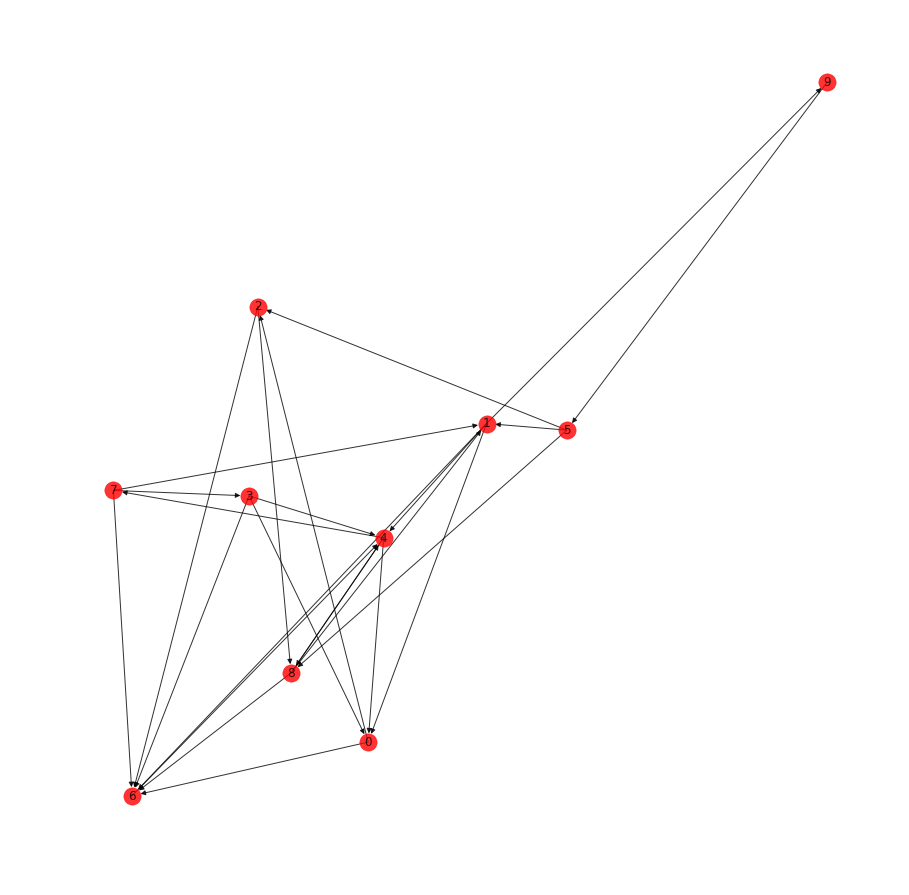

In [303]:
plt.figure(figsize=(12,12))

nx.draw(G, 
        with_labels=True,
        alpha=0.8)
plt.show()

## Breadth First Search

In [129]:
def bfs(graph, start=0):
    size = len(graph[0])
    if start >= size:
        print("start beyond graph size")
    else:
        color = np.zeros(size)
        discover = np.full(size, np.NAN)
        parent = np.full(size, np.NAN)
        
        color[start] = 1
        discover[start] = 0
        
        queue = []
        queue.append(start)
        
        while queue:
            if len(queue) == 1:
                tail_vertex = queue[0]
                queue = []
                for v in graph[1][tail_vertex]:
                    if color[v] == 0:
                        color[v] = 1
                        discover[v] = discover[tail_vertex] + 1
                        parent[v] = tail_vertex
                        queue.append(v)
                color[tail_vertex] = 2
                
            else:
                tail_vertex = queue[0]
                queue = queue[1:]
                for v in graph[1][tail_vertex]:
                    if color[v] == 0:
                        color[v] = 1
                        discover[v] = discover[tail_vertex] + 1
                        parent[v] = tail_vertex
                        queue.append(v)
                color[tail_vertex] = 2
        
        return [discover, parent]
                

In [169]:
bfs(test, 0)

[array([ 0., nan, 11.,  8.,  9.,  6., nan, nan, nan,  4.,  2.,  1., nan,
         7.,  2., nan, nan,  6.,  4.,  5., nan,  4.,  4.,  5.,  8.,  4.,
         4.,  6.,  8., nan,  3.,  3.,  3., 10., nan,  1.,  3., 10.,  5.,
         3.,  9.,  4.,  7., nan, nan, nan, nan, nan,  7.,  7., nan, nan,
         5.,  5.,  4.,  6.,  6.,  6., nan,  6., nan,  2.,  8.,  5.,  6.,
         7.,  6., nan, nan,  4., nan,  8., nan,  4.,  5.,  7.,  6.,  4.,
         7.,  4.,  7.,  3.,  5.,  7.,  3.,  9.,  2.,  6.,  5.,  5.,  6.,
         6.,  1.,  4.,  4.,  5.,  2., nan,  5., nan]),
 array([nan, nan, 33., 65., 24., 88., nan, nan, nan, 39., 35.,  0., nan,
        56., 92., nan, nan, 19., 84., 69., nan, 81., 30., 21., 65., 31.,
        84., 53., 80., nan, 61., 86., 10., 85., nan,  0., 86., 40., 22.,
        14.,  3., 81., 59., nan, nan, nan, nan, nan, 17., 76., nan, nan,
        54., 77., 30., 38., 74., 98., nan, 23., nan, 35., 48., 79., 88.,
        56., 88., nan, nan, 30., nan, 13., nan, 36., 94., 55., 95., 8

In [254]:
def bfs_path(graph, start, end, path=[]):
    size = len(graph[0])
    bfs_result = bfs(graph, start)
    previous_vertex = bfs_result[1][int(end)]
    
    if start == end:
        return [start]
    elif start >= size or end >= size:
        print("start or end beyond graph size")
    elif np.isnan(previous_vertex):
        print("there is no path")
    else:
        bfs_path(graph, start, previous_vertex, path)
        path.append(previous_vertex)
         
        return path

In [257]:
print(bfs_path(test, 0, 2, []))

[0.0, 92.0, 14.0, 39.0, 94.0, 88.0, 5.0, 80.0, 28.0, 85.0, 33.0]


## Depth First Search

In [293]:
def dfs(graph):
    size = len(graph[0])

    color = np.zeros(size)
    discover = np.full(size, np.NAN)
    finish = np.full(size, np.NAN)
    parent = np.full(size, np.NAN)
    time = 0
    
    for vertex in graph[0]:
        vertex = int(vertex)
        if color[vertex] == 0:
            dfs_visit(graph, vertex, time, color, discover, finish, parent)
    return [discover, finish, parent]       

In [311]:
def dfs_visit(graph, vertex, time, color, discover, finish, parent):
    time += 1
    color[vertex] = 1
    discover[vertex] = time
    
    for next_vertex in graph[1][vertex]:
        next_vertex = int(next_vertex)
        if color[next_vertex] == 0:
            parent[next_vertex] = vertex
            dfs_visit_result = dfs_visit(graph, next_vertex, time, color, discover, finish, parent)
            time = dfs_visit_result[0]
            color = dfs_visit_result[1]
            discover = dfs_visit_result[2]
            finish = dfs_visit_result[3]
            parent = dfs_visit_result[4]
    
    color[vertex] = 2
    time += 1
    finish[vertex] = time
    return [time, color, discover, finish, parent]

In [312]:
dfs(test)

[array([ 1.,  5., 10., 15.,  3.,  7.,  2.,  4.,  8.,  6.]),
 array([20., 14., 11., 16., 18., 12., 19., 17.,  9., 13.]),
 array([nan,  7.,  5.,  7.,  6.,  9.,  0.,  4.,  5.,  1.])]